In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Загрузка данных
df = pd.read_csv('../data/raw/superstore.csv', encoding='cp1251')

print(f" Датасет: {df.shape[0]} строк, {df.shape[1]} колонок")
print("=" * 80)


 Датасет: 9994 строк, 21 колонок


In [10]:
# Первый взгляд на данные
print(" ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ:")
print("=" * 80)

# Первые 5 строк
print("\n Первые 5 строк:")
print("-" * 80)
print(df.head())

print("\n Последние 5 строк:")
print("-" * 80)
print(df.tail())

print("\n Информация о столбцах:")
print("-" * 80)
print(df.info())


 ПЕРВЫЙ ВЗГЛЯД НА ДАННЫЕ:

 Первые 5 строк:
--------------------------------------------------------------------------------
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United 

In [12]:
# Проверка качества данных
print("\n ПРОВЕРКА КАЧЕСТВА ДАННЫХ:")
print("=" * 80)

# Пропуски
print("\n1 ПРОПУСКИ В ДАННЫХ:")
print("-" * 80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ Пропусков не найдено! Данные чистые.")
else:
    missing_percent = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Столбец': missing[missing > 0].index,
        'Кол-во пропусков': missing[missing > 0].values,
        'Процент': missing_percent[missing > 0].values
    })
    print(missing_df.to_string(index=False))

# Дубликаты
print("\n2 ДУБЛИКАТЫ:")
print("-" * 80)
duplicates_count = df.duplicated().sum()
print(f"Всего дублей: {duplicates_count}")
if duplicates_count > 0:
    print(f"Процент дублей: {duplicates_count/len(df)*100:.2f}%")
else:
    print("✓ Дублей не найдено!")

# Категориальные переменные
print("\n3 КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ (уникальные значения):")
print("-" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  • {col}: {unique_count} уникальных значений")
    if unique_count <= 5:
        print(f"    Значения: {df[col].unique().tolist()}")

# Статистика по числовым полям
print("\n4 ОПИСАТЕЛЬНАЯ СТАТИСТИКА (Числовые поля):")
print("-" * 80)
print(df.describe().to_string())

print("\n" + "=" * 80)



 ПРОВЕРКА КАЧЕСТВА ДАННЫХ:

1 ПРОПУСКИ В ДАННЫХ:
--------------------------------------------------------------------------------
✓ Пропусков не найдено! Данные чистые.

2 ДУБЛИКАТЫ:
--------------------------------------------------------------------------------
Всего дублей: 0
✓ Дублей не найдено!

3 КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ (уникальные значения):
--------------------------------------------------------------------------------
  • Order ID: 5009 уникальных значений
  • Order Date: 1237 уникальных значений
  • Ship Date: 1334 уникальных значений
  • Ship Mode: 4 уникальных значений
    Значения: ['Second Class', 'Standard Class', 'First Class', 'Same Day']
  • Customer ID: 793 уникальных значений
  • Customer Name: 793 уникальных значений
  • Segment: 3 уникальных значений
    Значения: ['Consumer', 'Corporate', 'Home Office']
  • Country: 1 уникальных значений
    Значения: ['United States']
  • City: 531 уникальных значений
  • State: 49 уникальных значений
  • Region: 4 уникальны

In [13]:
print("\nПРЕОБРАЗОВАНИЕ ДАННЫХ И СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ:")
print("=" * 80)

# Преобразуем даты
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True, errors='coerce')

print("Даты преобразованы в формат datetime")

# Создаём новые признаки на основе дат
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.strftime('%Y-%m')
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Order Day of Week'] = df['Order Date'].dt.day_name()

print("Добавлены: Year, Month, Month Name, Quarter, Day of Week")

# Количество дней доставки
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days

print("Добавлен Shipping Days")

# Маржа прибыли (%)
df['Profit Margin %'] = (df['Profit'] / df['Sales'] * 100).round(2)

print("Добавлен Profit Margin %")

# Average Order Value (AOV)
df['AOV'] = (df['Sales'] / df['Quantity']).round(2)

print("Добавлен AOV (Average Order Value)")

# Статус прибыльности
df['Profitability'] = df['Profit'].apply(lambda x: 'Profitable' if x > 0 else 'Loss')

print("Добавлен Profitability (Profitable/Loss)")

# Категоризация скидок
df['Discount Band'] = pd.cut(df['Discount'], 
                              bins=[-0.01, 0, 0.1, 0.2, 0.3, 1.0],
                              labels=['No Discount', '1-10%', '10-20%', '20-30%', '30%+'])

print("Добавлена Discount Band")

print("\nВСЕ ПРИЗНАКИ СОЗДАНЫ УСПЕШНО")
print("=" * 80)



ПРЕОБРАЗОВАНИЕ ДАННЫХ И СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ:
Даты преобразованы в формат datetime
Добавлены: Year, Month, Month Name, Quarter, Day of Week
Добавлен Shipping Days
Добавлен Profit Margin %
Добавлен AOV (Average Order Value)
Добавлен Profitability (Profitable/Loss)
Добавлена Discount Band

ВСЕ ПРИЗНАКИ СОЗДАНЫ УСПЕШНО



АНАЛИЗ ПО КАТЕГОРИЯМ И СЕГМЕНТАМ:

Продажи и прибыль по категориям:
                 Total Sales  Avg Sales  Total Profit  Avg Profit  Order Count
Category                                                                      
Furniture          741999.80     349.83      18451.27        8.70         2121
Office Supplies    719047.03     119.32     122490.80       20.33         6026
Technology         836154.03     452.71     145454.95       78.75         1847

Продажи и прибыль по сегментам:
             Total Sales  Total Profit    Qty  Customers  Avg Discount
Segment                                                               
Consumer      1161401.34     134119.21  19521       5191          0.16
Corporate      706146.37      91979.13  11608       3020          0.16
Home Office    429653.15      60298.68   6744       1783          0.15


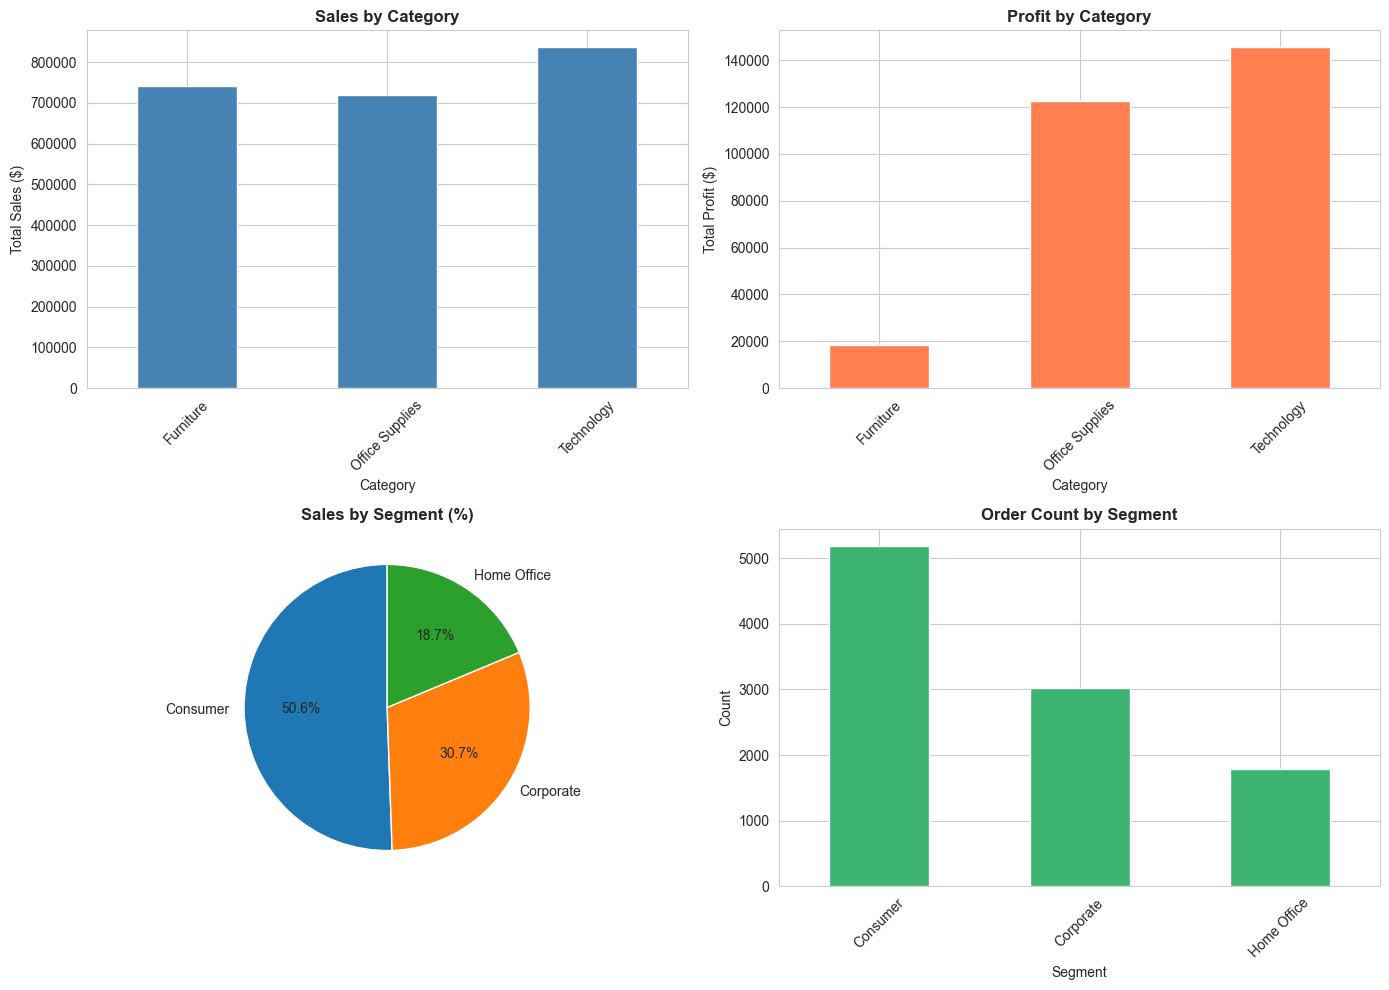

In [14]:
print("\nАНАЛИЗ ПО КАТЕГОРИЯМ И СЕГМЕНТАМ:")
print("=" * 80)

# Анализ по категориям
sales_by_category = df.groupby('Category').agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean'],
    'Order ID': 'count'
}).round(2)

sales_by_category.columns = ['Total Sales', 'Avg Sales', 'Total Profit', 'Avg Profit', 'Order Count']
print("\nПродажи и прибыль по категориям:")
print(sales_by_category)

# Анализ по сегментам
segment_analysis = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Customer ID': 'count',
    'Discount': 'mean'
}).round(2)

segment_analysis.columns = ['Total Sales', 'Total Profit', 'Qty', 'Customers', 'Avg Discount']
print("\nПродажи и прибыль по сегментам:")
print(segment_analysis)

# Графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Продажи по категориям
df.groupby('Category')['Sales'].sum().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Sales by Category', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].set_xlabel('Category')
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Прибыль по категориям
df.groupby('Category')['Profit'].sum().plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Profit by Category', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Total Profit ($)')
axes[0, 1].set_xlabel('Category')
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Продажи по сегментам (Pie)
segment_sales = df.groupby('Segment')['Sales'].sum()
axes[1, 0].pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Sales by Segment (%)', fontweight='bold')

# График 4: Среднее количество заказов по сегментам
df.groupby('Segment')['Customer ID'].count().plot(kind='bar', ax=axes[1, 1], color='mediumseagreen')
axes[1, 1].set_title('Order Count by Segment', fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xlabel('Segment')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)



АНАЛИЗ ПО ПОДКАТЕГОРИЯМ ТОВАРОВ:

ТОП-10 подкатегорий по продажам:
Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Name: Sales, dtype: float64

ТОП-10 подкатегорий по прибыли:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: Profit, dtype: float64

ТОП-5 убыточных подкатегорий:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

Детальный анализ подкатегорий (Top 15):
              Total Sales  Total Profit  Order Count

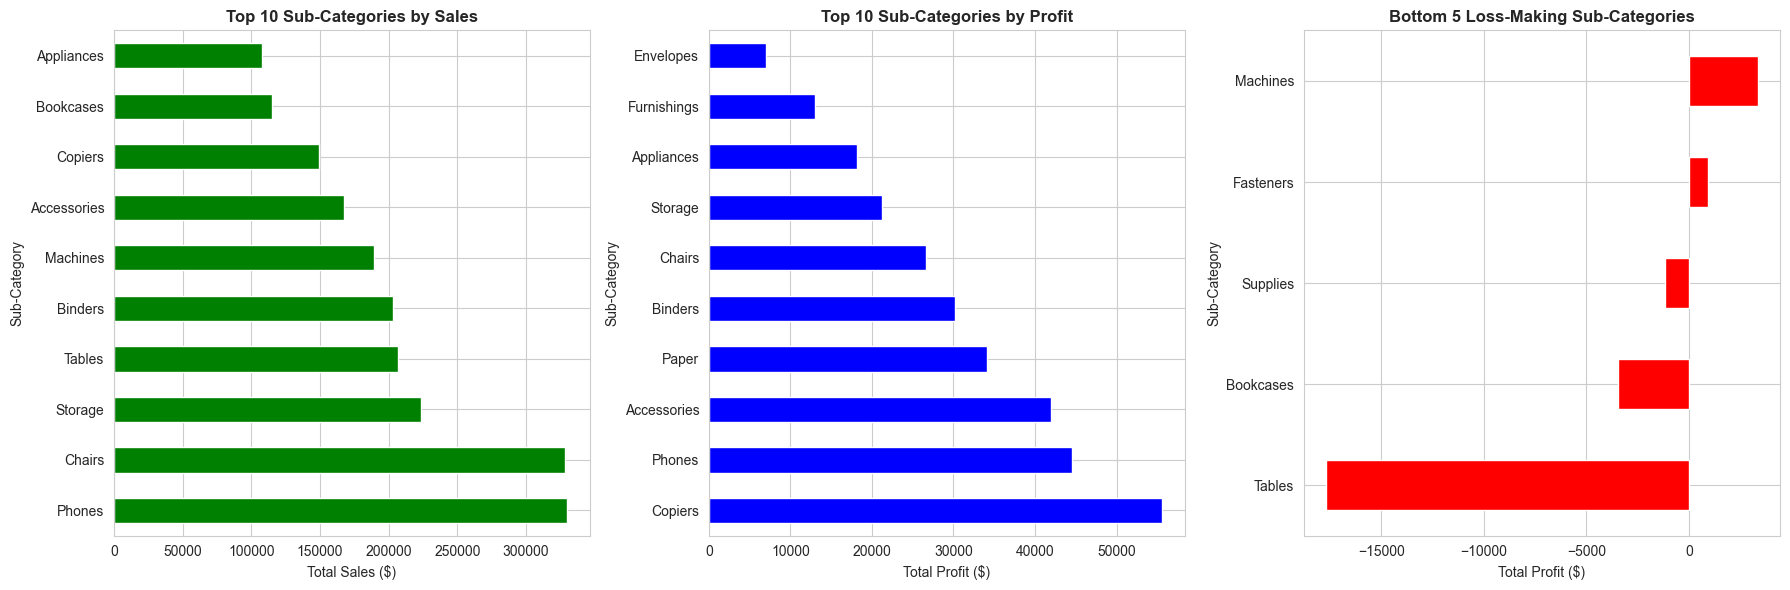

In [15]:
print("\nАНАЛИЗ ПО ПОДКАТЕГОРИЯМ ТОВАРОВ:")
print("=" * 80)

# Top 10 подкатегорий по продажам
top_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nТОП-10 подкатегорий по продажам:")
print(top_sales)

# Top 10 подкатегорий по прибыли
top_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)
print("\nТОП-10 подкатегорий по прибыли:")
print(top_profit)

# Bottom 5 убыточных подкатегорий
bottom_products = df.groupby('Sub-Category')['Profit'].sum().sort_values().head(5)
print("\nТОП-5 убыточных подкатегорий:")
print(bottom_products)

# Детальный анализ Sub-Category
subcat_analysis = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count',
    'Discount': 'mean'
}).round(2)

subcat_analysis['Profit Margin %'] = (subcat_analysis['Profit'] / subcat_analysis['Sales'] * 100).round(2)
subcat_analysis.columns = ['Total Sales', 'Total Profit', 'Order Count', 'Avg Discount', 'Profit Margin %']
subcat_analysis = subcat_analysis.sort_values('Total Profit', ascending=False)

print("\nДетальный анализ подкатегорий (Top 15):")
print(subcat_analysis.head(15))

# Графики
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График 1: Top 10 по продажам
top_sales.plot(kind='barh', ax=axes[0], color='green')
axes[0].set_title('Top 10 Sub-Categories by Sales', fontweight='bold')
axes[0].set_xlabel('Total Sales ($)')

# График 2: Top 10 по прибыли
top_profit.plot(kind='barh', ax=axes[1], color='blue')
axes[1].set_title('Top 10 Sub-Categories by Profit', fontweight='bold')
axes[1].set_xlabel('Total Profit ($)')

# График 3: Bottom 5 убыточных
bottom_products.plot(kind='barh', ax=axes[2], color='red')
axes[2].set_title('Bottom 5 Loss-Making Sub-Categories', fontweight='bold')
axes[2].set_xlabel('Total Profit ($)')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)



АНАЛИЗ ДОСТАВКИ:

Энайка Shipping Days:
count    9994.00
mean        3.96
std         1.75
min         0.00
25%         3.00
50%         4.00
75%         5.00
max         7.00
Name: Shipping Days, dtype: float64

Анализ по способам доставки:
                Avg Days  Min Days  Max Days  Avg Sales  Avg Profit  Orders
Ship Mode                                                                  
First Class         2.18         1         4     228.50       31.84    1538
Same Day            0.04         0         1     236.40       29.27     543
Second Class        3.24         1         5     236.09       29.54    1945
Standard Class      5.01         3         7     227.58       27.49    5968

Анализ доставки по способам и регионам (первые 10):
                      Avg Ship Days  Order Count  Total Sales  Avg Profit
Ship Mode    Region                                                      
First Class  Central           2.32          299     58746.92       12.40
             East         

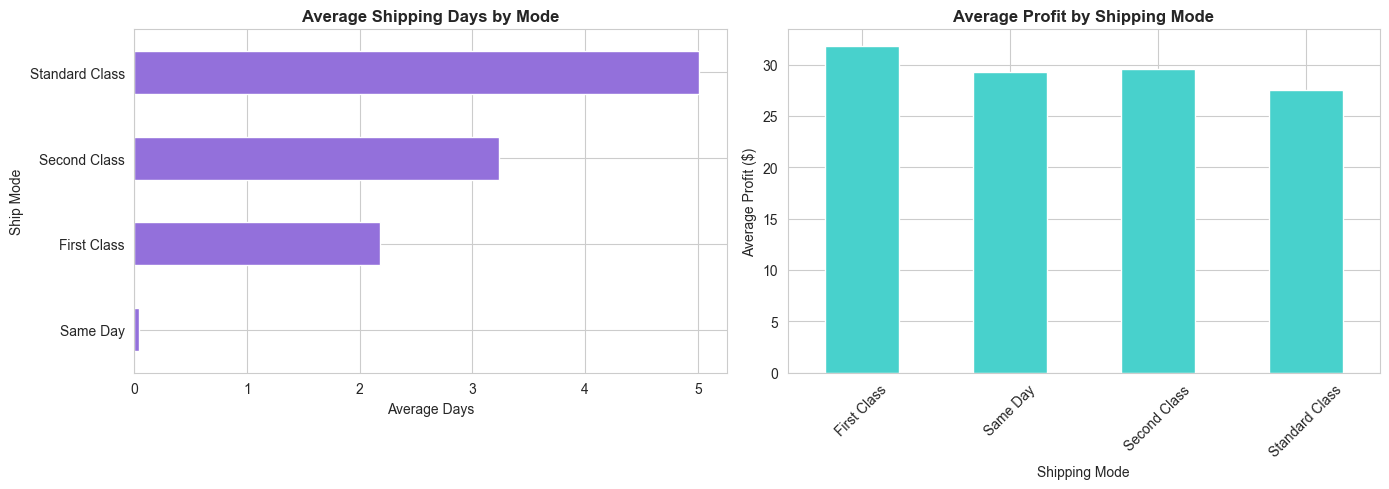

In [16]:
print("\nАНАЛИЗ ДОСТАВКИ:")
print("=" * 80)

# Описательная статистика Shipping Days
print("\nЭнайка Shipping Days:")
print(df['Shipping Days'].describe().round(2))

# Анализ по способам доставки
shipping_analysis = df.groupby('Ship Mode').agg({
    'Shipping Days': ['mean', 'min', 'max'],
    'Sales': 'mean',
    'Profit': 'mean',
    'Order ID': 'count'
}).round(2)

shipping_analysis.columns = ['Avg Days', 'Min Days', 'Max Days', 'Avg Sales', 'Avg Profit', 'Orders']
print("\nАнализ по способам доставки:")
print(shipping_analysis)

# Анализ по регионам и способам доставки
shipping_region = df.groupby(['Ship Mode', 'Region']).agg({
    'Shipping Days': 'mean',
    'Order ID': 'count',
    'Sales': 'sum',
    'Profit': 'mean'
}).round(2)

shipping_region.columns = ['Avg Ship Days', 'Order Count', 'Total Sales', 'Avg Profit']
print("\nАнализ доставки по способам и регионам (первые 10):")
print(shipping_region.head(10))

# Графики
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Среднее время доставки по способам
df.groupby('Ship Mode')['Shipping Days'].mean().sort_values().plot(kind='barh', ax=axes[0], color='mediumpurple')
axes[0].set_title('Average Shipping Days by Mode', fontweight='bold')
axes[0].set_xlabel('Average Days')

# График 2: Средняя прибыль по способам доставки
df.groupby('Ship Mode')['Profit'].mean().plot(kind='bar', ax=axes[1], color='mediumturquoise')
axes[1].set_title('Average Profit by Shipping Mode', fontweight='bold')
axes[1].set_ylabel('Average Profit ($)')
axes[1].set_xlabel('Shipping Mode')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)



ВРЕМЕННОЙ АНАЛИЗ:

Динамика по месяцам (первые 10 месяцев):
               Sales   Profit  Order ID
Order Date                             
2014-01     14236.90  2450.19        79
2014-02      4519.89   862.31        46
2014-03     55691.01   498.73       157
2014-04     28295.34  3488.84       135
2014-05     23648.29  2738.71       122
2014-06     34595.13  4976.52       135
2014-07     33946.39  -841.48       143
2014-08     27909.47  5318.10       153
2014-09     81777.35  8328.10       268
2014-10     31453.39  3448.26       159


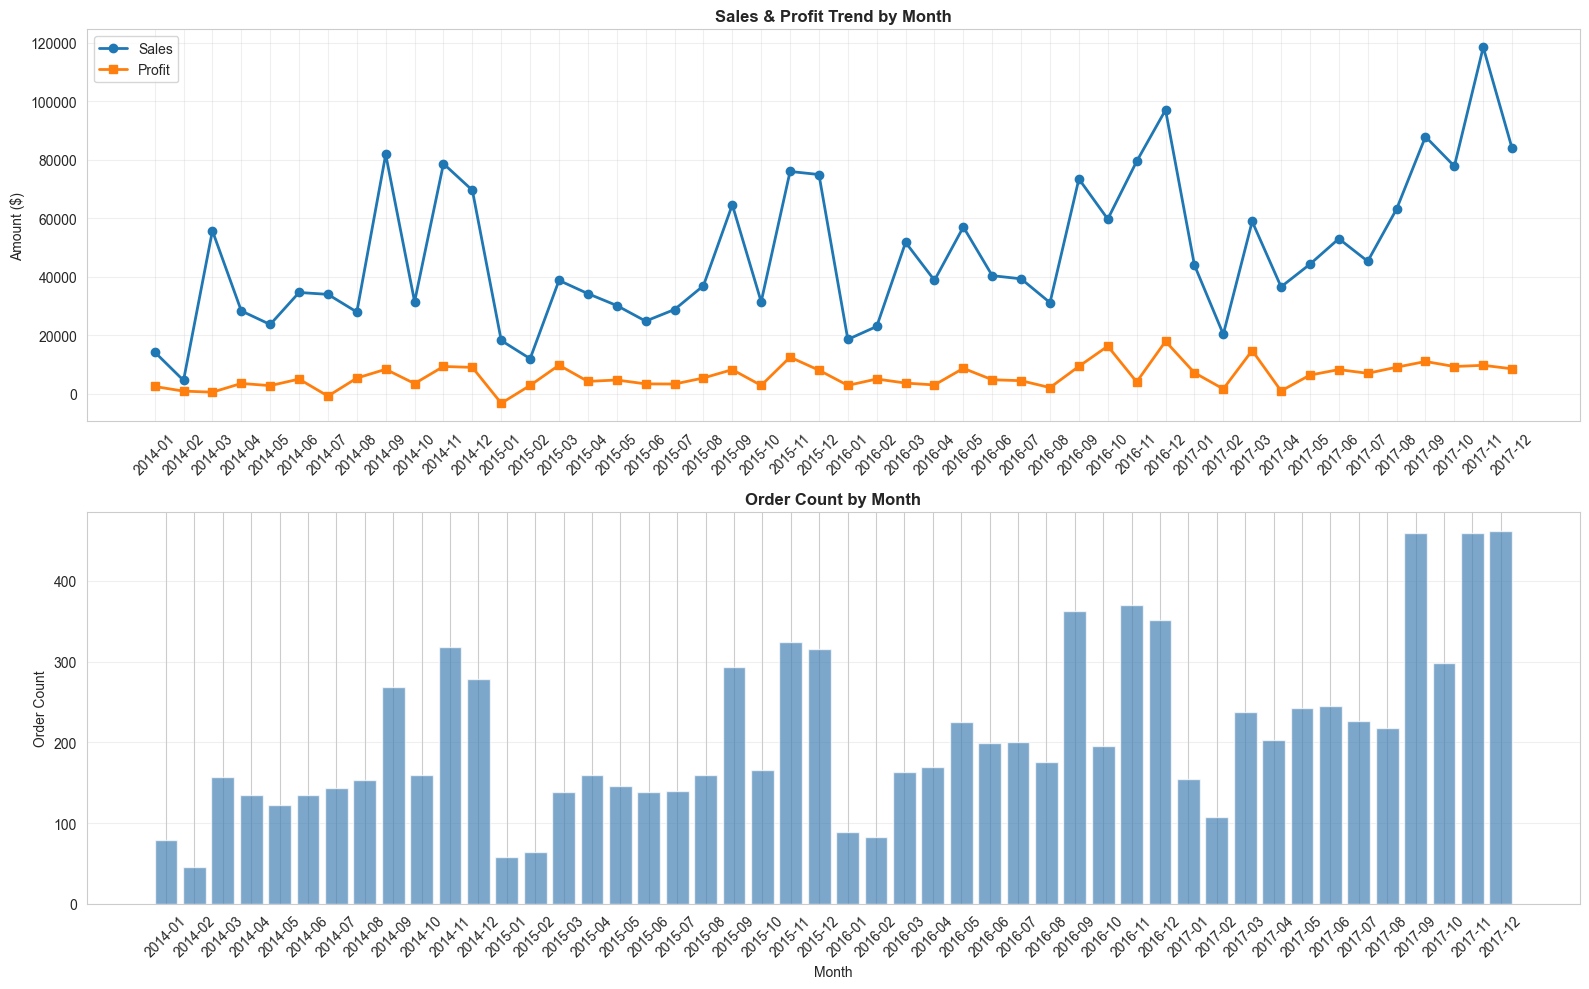

In [17]:
print("\nВРЕМЕННОЙ АНАЛИЗ:")
print("=" * 80)

# Месячная агрегация
monthly_data = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).round(2)

monthly_data.index = monthly_data.index.astype(str)

print("\nДинамика по месяцам (первые 10 месяцев):")
print(monthly_data.head(10))

# Графики
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# График 1: Продажи и прибыль по месяцам
axes[0].plot(monthly_data.index, monthly_data['Sales'], marker='o', label='Sales', linewidth=2)
axes[0].plot(monthly_data.index, monthly_data['Profit'], marker='s', label='Profit', linewidth=2)
axes[0].set_title('Sales & Profit Trend by Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Amount ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# График 2: Количество заказов по месяцам
axes[1].bar(monthly_data.index, monthly_data['Order ID'], color='steelblue', alpha=0.7)
axes[1].set_title('Order Count by Month', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Order Count')
axes[1].set_xlabel('Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)



АНАЛИЗ УБЫТОЧНЫХ ЗАКАЗОВ И ВЛИЯНИЯ СКИДОК:

Всего убыточных заказов: 1871 из 9994 (18.72%)
Общая сумма убытков: $-156,131.29
Средний убыток на заказ: $-83.45

Убыточные заказы по категориям:
                   Profit               Discount
                      sum count    mean     mean
Category                                        
Furniture       -60936.11   714  -85.34     0.37
Office Supplies -56615.26   886  -63.90     0.62
Technology      -38579.92   271 -142.36     0.33

Корреляция Discount-Profit: -0.219
Средняя скидка при убытке: 48.09%
Средняя скидка в целом: 15.62%

Влияние скидок на прибыль:
               Order Count  Total Sales  Total Profit  Avg Profit Margin %
Discount Band                                                             
No Discount           4798   1087908.47     320987.60                34.02
1-10%                   94     54369.35       9029.18                15.58
10-20%                3709    792152.89      91756.30                17.48
20-30%    

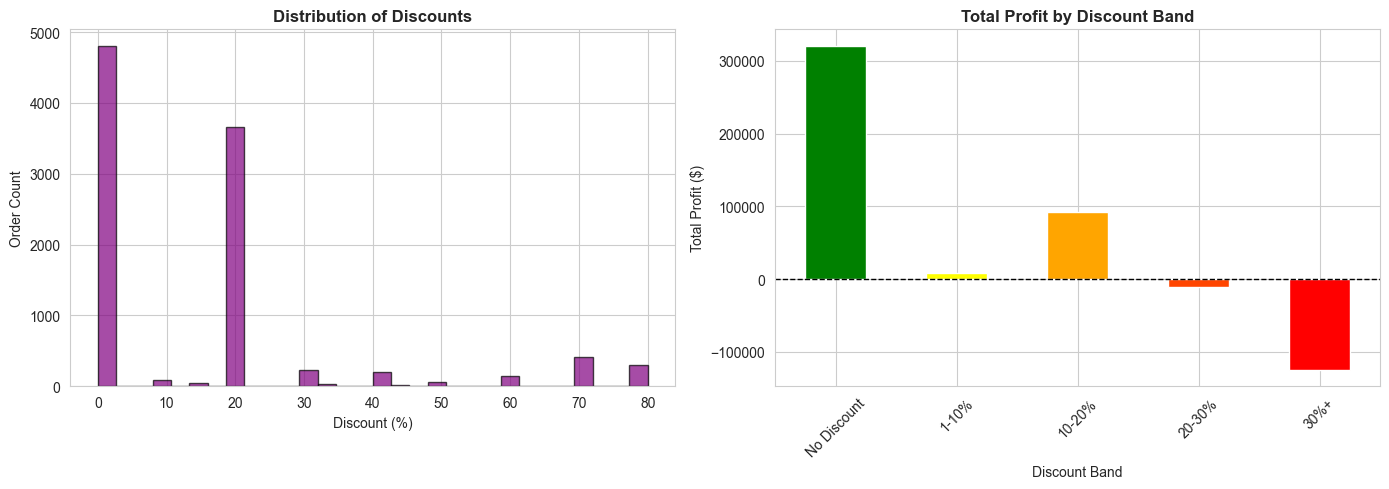

In [18]:
print("\nАНАЛИЗ УБЫТОЧНЫХ ЗАКАЗОВ И ВЛИЯНИЯ СКИДОК:")
print("=" * 80)

# Убыточные заказы
losing_orders = df[df['Profit'] < 0]

print(f"\nВсего убыточных заказов: {len(losing_orders)} из {len(df)} ({len(losing_orders)/len(df)*100:.2f}%)")
print(f"Общая сумма убытков: ${losing_orders['Profit'].sum():,.2f}")
print(f"Средний убыток на заказ: ${losing_orders['Profit'].mean():.2f}")

# Убыточные по категориям
losing_by_category = losing_orders.groupby('Category').agg({
    'Profit': ['sum', 'count', 'mean'],
    'Discount': 'mean'
}).round(2)

print("\nУбыточные заказы по категориям:")
print(losing_by_category)

# Корреляция скидки и прибыли
correlation = df['Discount'].corr(df['Profit'])
print(f"\nКорреляция Discount-Profit: {correlation:.3f}")
print(f"Средняя скидка при убытке: {losing_orders['Discount'].mean()*100:.2f}%")
print(f"Средняя скидка в целом: {df['Discount'].mean()*100:.2f}%")

# Анализ по группам скидок
discount_impact = df.groupby('Discount Band').agg({
    'Order ID': 'count',
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin %': 'mean'
}).round(2)

discount_impact.columns = ['Order Count', 'Total Sales', 'Total Profit', 'Avg Profit Margin %']

print("\nВлияние скидок на прибыль:")
print(discount_impact)

# График: распределение скидок и прибыльность
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Распределение скидок
axes[0].hist(df['Discount']*100, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Discounts', fontweight='bold')
axes[0].set_ylabel('Order Count')
axes[0].set_xlabel('Discount (%)')

# График 2: Прибыль по группам скидок
discount_impact['Total Profit'].plot(kind='bar', ax=axes[1], color=['green', 'yellow', 'orange', 'orangered', 'red'])
axes[1].set_title('Total Profit by Discount Band', fontweight='bold')
axes[1].set_ylabel('Total Profit ($)')
axes[1].set_xlabel('Discount Band')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)



КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:

Матрица корреляций:
                 Sales  Quantity  Discount  Profit  Shipping Days  \
Sales            1.000     0.201    -0.028   0.479         -0.007   
Quantity         0.201     1.000     0.009   0.066          0.018   
Discount        -0.028     0.009     1.000  -0.219          0.000   
Profit           0.479     0.066    -0.219   1.000         -0.005   
Shipping Days   -0.007     0.018     0.000  -0.005          1.000   
Profit Margin %  0.003    -0.005    -0.864   0.224         -0.012   
AOV              0.889    -0.003    -0.033   0.468         -0.013   

                 Profit Margin %    AOV  
Sales                      0.003  0.889  
Quantity                  -0.005 -0.003  
Discount                  -0.864 -0.033  
Profit                     0.224  0.468  
Shipping Days             -0.012 -0.013  
Profit Margin %            1.000  0.007  
AOV                        0.007  1.000  


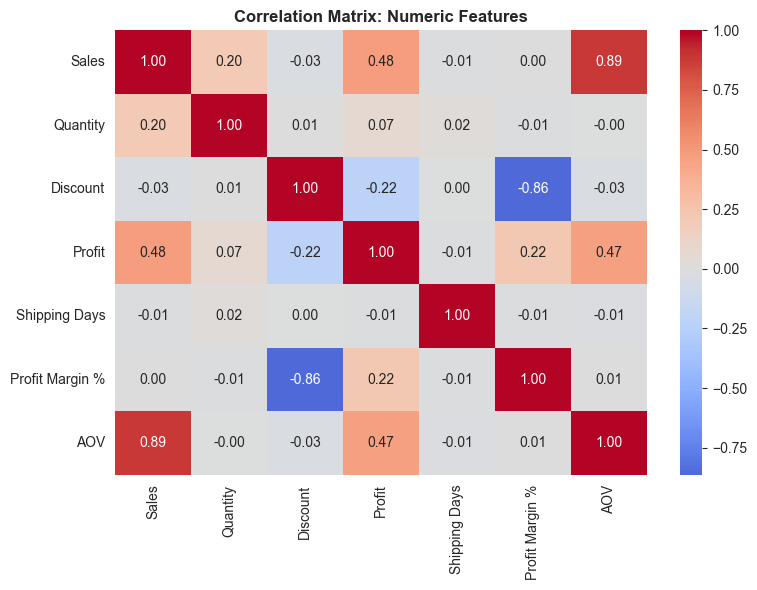


Ключевые корреляции:
Discount-Profit: -0.219
Sales-Profit: 0.479
Shipping Days-Profit: -0.005


САВРАНИЕ ОБРАБОТАННЫХ ДАННЫХ:
Сохранен: orders_cleaned.csv
Сохранен: fact_orders.csv

========== EDA ЗАВЕРШЕНА ==========
Общие KPI:
Total Sales: $2,297,200.86
Total Profit: $286,397.02
Profit Margin: 12.47%
Total Orders: 9994
Total Customers: 793
Loss Rate: 18.72%


In [19]:
print("\nКОРРЕЛЯЦИОННЫЙ АНАЛИЗ:")
print("=" * 80)

# Выбираем числовые данные
numeric_data = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Days', 'Profit Margin %', 'AOV']].copy()

correlation_matrix = numeric_data.corr().round(3)

print("\nМатрица корреляций:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix: Numeric Features', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nКлючевые корреляции:")
print(f"Discount-Profit: {df['Discount'].corr(df['Profit']):.3f}")
print(f"Sales-Profit: {df['Sales'].corr(df['Profit']):.3f}")
print(f"Shipping Days-Profit: {df['Shipping Days'].corr(df['Profit']):.3f}")

print("\n" + "=" * 80)
print("\nСАВРАНИЕ ОБРАБОТАННЫХ ДАННЫХ:")
print("=" * 80)

# Сохранение полного датасета
df.to_csv('../data/processed/orders_cleaned.csv', index=False)
print("Сохранен: orders_cleaned.csv")

# Сохранение для SQL/Power BI
df_for_sql = df[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
                   'Customer ID', 'Customer Name', 'Segment', 'Region', 'City', 'Category', 
                   'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
                   'Shipping Days', 'Profit Margin %', 'AOV', 'Profitability']].copy()

df_for_sql.to_csv('../data/processed/fact_orders.csv', index=False)
print("Сохранен: fact_orders.csv")

print("\n========== EDA ЗАВЕРШЕНА ==========")
print(f"Общие KPI:")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Profit Margin: {df['Profit'].sum()/df['Sales'].sum()*100:.2f}%")
print(f"Total Orders: {len(df)}")
print(f"Total Customers: {df['Customer ID'].nunique()}")
print(f"Loss Rate: {len(df[df['Profit'] < 0])/len(df)*100:.2f}%")
print("=" * 80)
